Attendance Data
- Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

- You should end up with this:


| student | score  |
| ------- | -----  |
| Billy   | 0.2250 |
| Jane    | 0.1875 |
| John    | 0.7125 |
| Sally   | 0.3625 |

Coffee Levels

- Read the coffee_levels.csv file.
- Transform the data so that each carafe is in it's own column.
- Is this the best shape for the data?

Cake Recipes

- Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
- Tidy the data as necessary.
- Which recipe, on average, is the best? recipe b
- Which oven temperature, on average, produces the best results? 275
- Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [1]:
import pandas as pd
import numpy as np

### Attendance Data
- Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [2]:
df = pd.read_csv('./untidy_data/attendance.csv')
df

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [3]:
df.rename(columns = {"Unnamed: 0":"student"}, inplace=True)

In [4]:
df = df.melt(id_vars="student")
df.head()

,student,variable,value
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [5]:
df = df.pivot_table(columns="value",index="student", aggfunc="count").fillna(0).astype(int)
df

variable         
value          A  H  P  T
student                  
Billy          3  1  1  3
Jane           2  0  1  5
John           0  1  5  2
Sally          1  1  2  4

In [6]:
df.columns = ['a', 'h', 'p', 't']
df

,a,h,p,t
student,,,,
Billy,3,1,1,3
Jane,2,0,1,5
John,0,1,5,2
Sally,1,1,2,4


In [7]:
df['sum'] = df['a'] + df['h'] + df['p'] + df['t']
df

,a,h,p,t,sum
student,,,,,
Billy,3,1,1,3,8
Jane,2,0,1,5,8
John,0,1,5,2,8
Sally,1,1,2,4,8


In [8]:
df['p(attendance1)'] = (df['sum'] - df['a'] - .5*df['h'] - .1*df['t']) / df['sum']
df

,a,h,p,t,sum,p(attendance1)
student,,,,,,
Billy,3,1,1,3,8,0.5250
Jane,2,0,1,5,8,0.6875
John,0,1,5,2,8,0.9125
Sally,1,1,2,4,8,0.7625


### Coffee Levels

- Read the coffee_levels.csv file.
- Transform the data so that each carafe is in it's own column.
- Is this the best shape for the data?

In [9]:
df = pd.read_csv('./untidy_data/coffee_levels.csv')
df

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


In [10]:
df.pivot_table('coffee_amount','hour','coffee_carafe')

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


In [11]:
df.set_index(['hour','coffee_carafe']).unstack()

coffee_amount                    
coffee_carafe             x         y         z
hour                                           
8                  0.816164  0.189297  0.999264
9                  0.451018  0.521502  0.915990
10                 0.843279  0.023163  0.144928
11                 0.335533  0.235529  0.311495
12                 0.898291  0.017009  0.771947
13                 0.310711  0.997464  0.398520
14                 0.507288  0.058361  0.864464
15                 0.215043  0.144644  0.436364
16                 0.183891  0.544676  0.280621
17                 0.391560  0.594126  0.436677

> it depends what you want to do with it

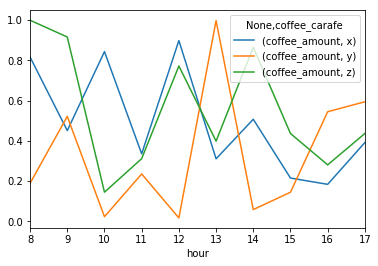

In [13]:
# %matplotlib inline
import matplotlib.pyplot
df.set_index(['hour','coffee_carafe']).unstack().plot()

### Cake Recipes

- Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
- Tidy the data as necessary.
- Which recipe, on average, is the best? recipe b
- Which oven temperature, on average, produces the best results? 275
- Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [14]:
df = pd.read_csv("./untidy_data/cake_recipes.csv")
df

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [15]:
df['recipe'] = df['recipe:position'].str.extract(r'^(\w):')

In [16]:
df['position'] = df['recipe:position'].str.extract(r'^\w:(\w+)')

In [17]:
df.drop(columns=["recipe:position"],inplace=True)

In [18]:
df

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [19]:
df = df.melt(id_vars=['recipe','position'], var_name = "temp", value_name="taste")

Which recipe, on average, is the best? recipe b

In [20]:
df.groupby('recipe').mean()

,taste
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


Which oven temperature, on average, produces the best results? 275

In [21]:
df.groupby('temp').mean()

,taste
temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [22]:
df.sort_values("taste", ascending=False).head(1)

,recipe,position,temp,taste
26,b,bottom,300,99.248541
